In [4]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')

# Infinite row of vortices

In [211]:
import numpy as np
import matplotlib.pyplot as plt
# embed the figures into the notebook
%matplotlib inline

In [212]:
# Class for vortex
class Vortex:

    # The init method or constructor
    def __init__(self, Gamma, x0, y0, X, Y):

        # Attributes
        self.x0 = x0
        self.y0 = y0
        self.Gamma = Gamma
        self.psi = +Gamma/(4*np.pi)*np.log(np.sqrt((X - x0)**2 + (Y - y0)**2))
        self.phi = -Gamma/(4*np.pi)*np.arctan2((Y - y0), (X - x0))
        self.u = +Gamma/(2*np.pi)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)
        self.v = -Gamma/(2*np.pi)*(X - x0)/((X - x0)**2 + (Y - y0)**2)
     

In [213]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -0.5, 0.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)             # generates a mesh grid

In [214]:
M = 198
Gamma = 5
x_row = np.linspace(-32, 32, M)
vortices = [Vortex(Gamma, xx, 0, X, Y) for xx in x_row]

In [215]:
psi = np.zeros((N, N), dtype=float)
u = np.zeros((N, N), dtype=float)
v = np.zeros((N, N), dtype=float)

for obj in vortices:
    psi += obj.psi
    u += obj.u
    v += obj.v

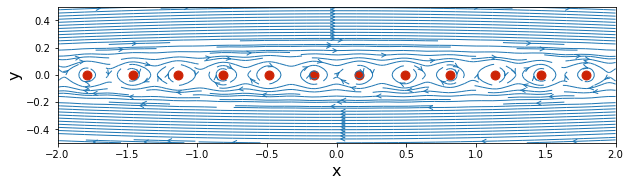

In [216]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_row, x_row*0, color='#CD2305', s=80, marker='o');

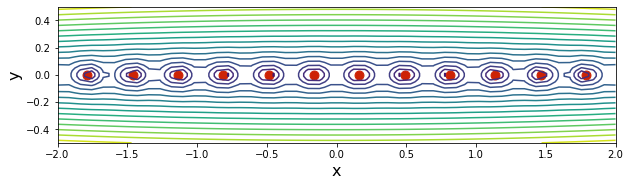

In [217]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.contour(X, Y, psi, levels=16)
plt.scatter(x_row, x_row*0, color='#CD2305', s=80, marker='o');